<a href="https://colab.research.google.com/github/Rajeshgit-R/customer_churn_prediction_project/blob/main/customer_churn__prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Display the few rows of the dataset:

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get the summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# check the rows and columns of dataset

data.shape

(7043, 21)

In [6]:
# check the total of size of the dataset

data.size

147903

In [7]:
# check the datatypes

data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
# Display the columnns of the dataset

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#check the null values

data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
# check the duplicate values

data.duplicated().sum()

0

In [12]:
data["TotalCharges"].dtype

dtype('O')

In [13]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")

In [14]:
data["TotalCharges"].dtype

dtype('float64')

In [15]:
# split the categorical data

categorical_features=[
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

# split the numerical data

numerical_features=["tenure","MonthlyCharges","TotalCharges"]
target="Churn"

In [16]:
data.skew(numeric_only=True)

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524
TotalCharges,0.961642


In [17]:
data.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [18]:
data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


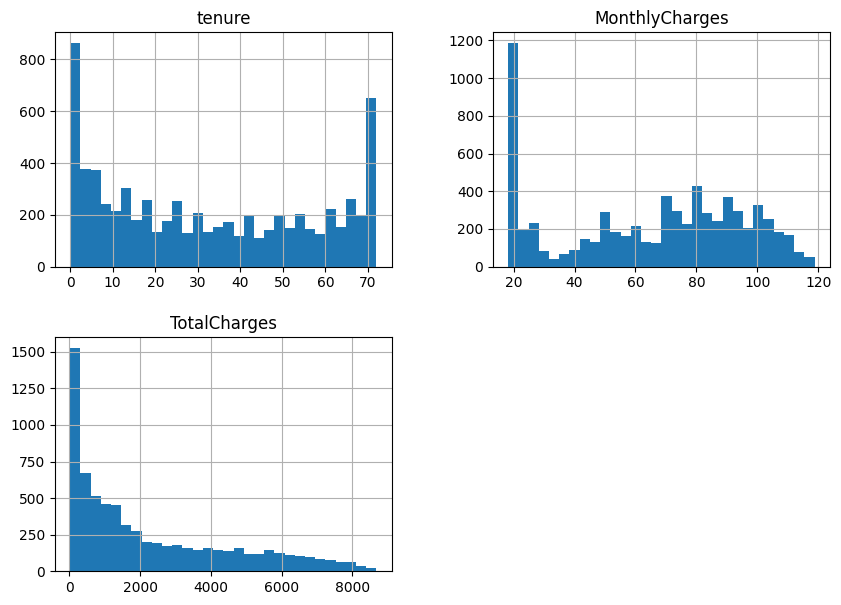

In [19]:
# Visualizing Distribution of Numerical Features using hist plot

data[numerical_features].hist(bins=30,figsize=(10,7));

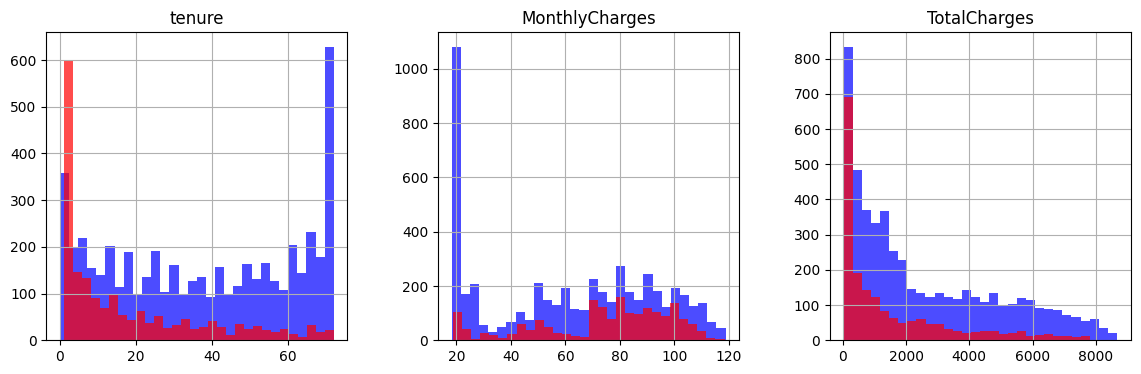

In [20]:
# Visualizing Numerical Feature Distributions by Churn Status

fig,ax=plt.subplots(1,3,figsize=(14,4))
data[data.Churn=="No"][numerical_features].hist(bins=30,color="blue",alpha=0.7,ax=ax);
data[data.Churn=="Yes"][numerical_features].hist(bins=30,color="red",alpha=0.7,ax=ax);

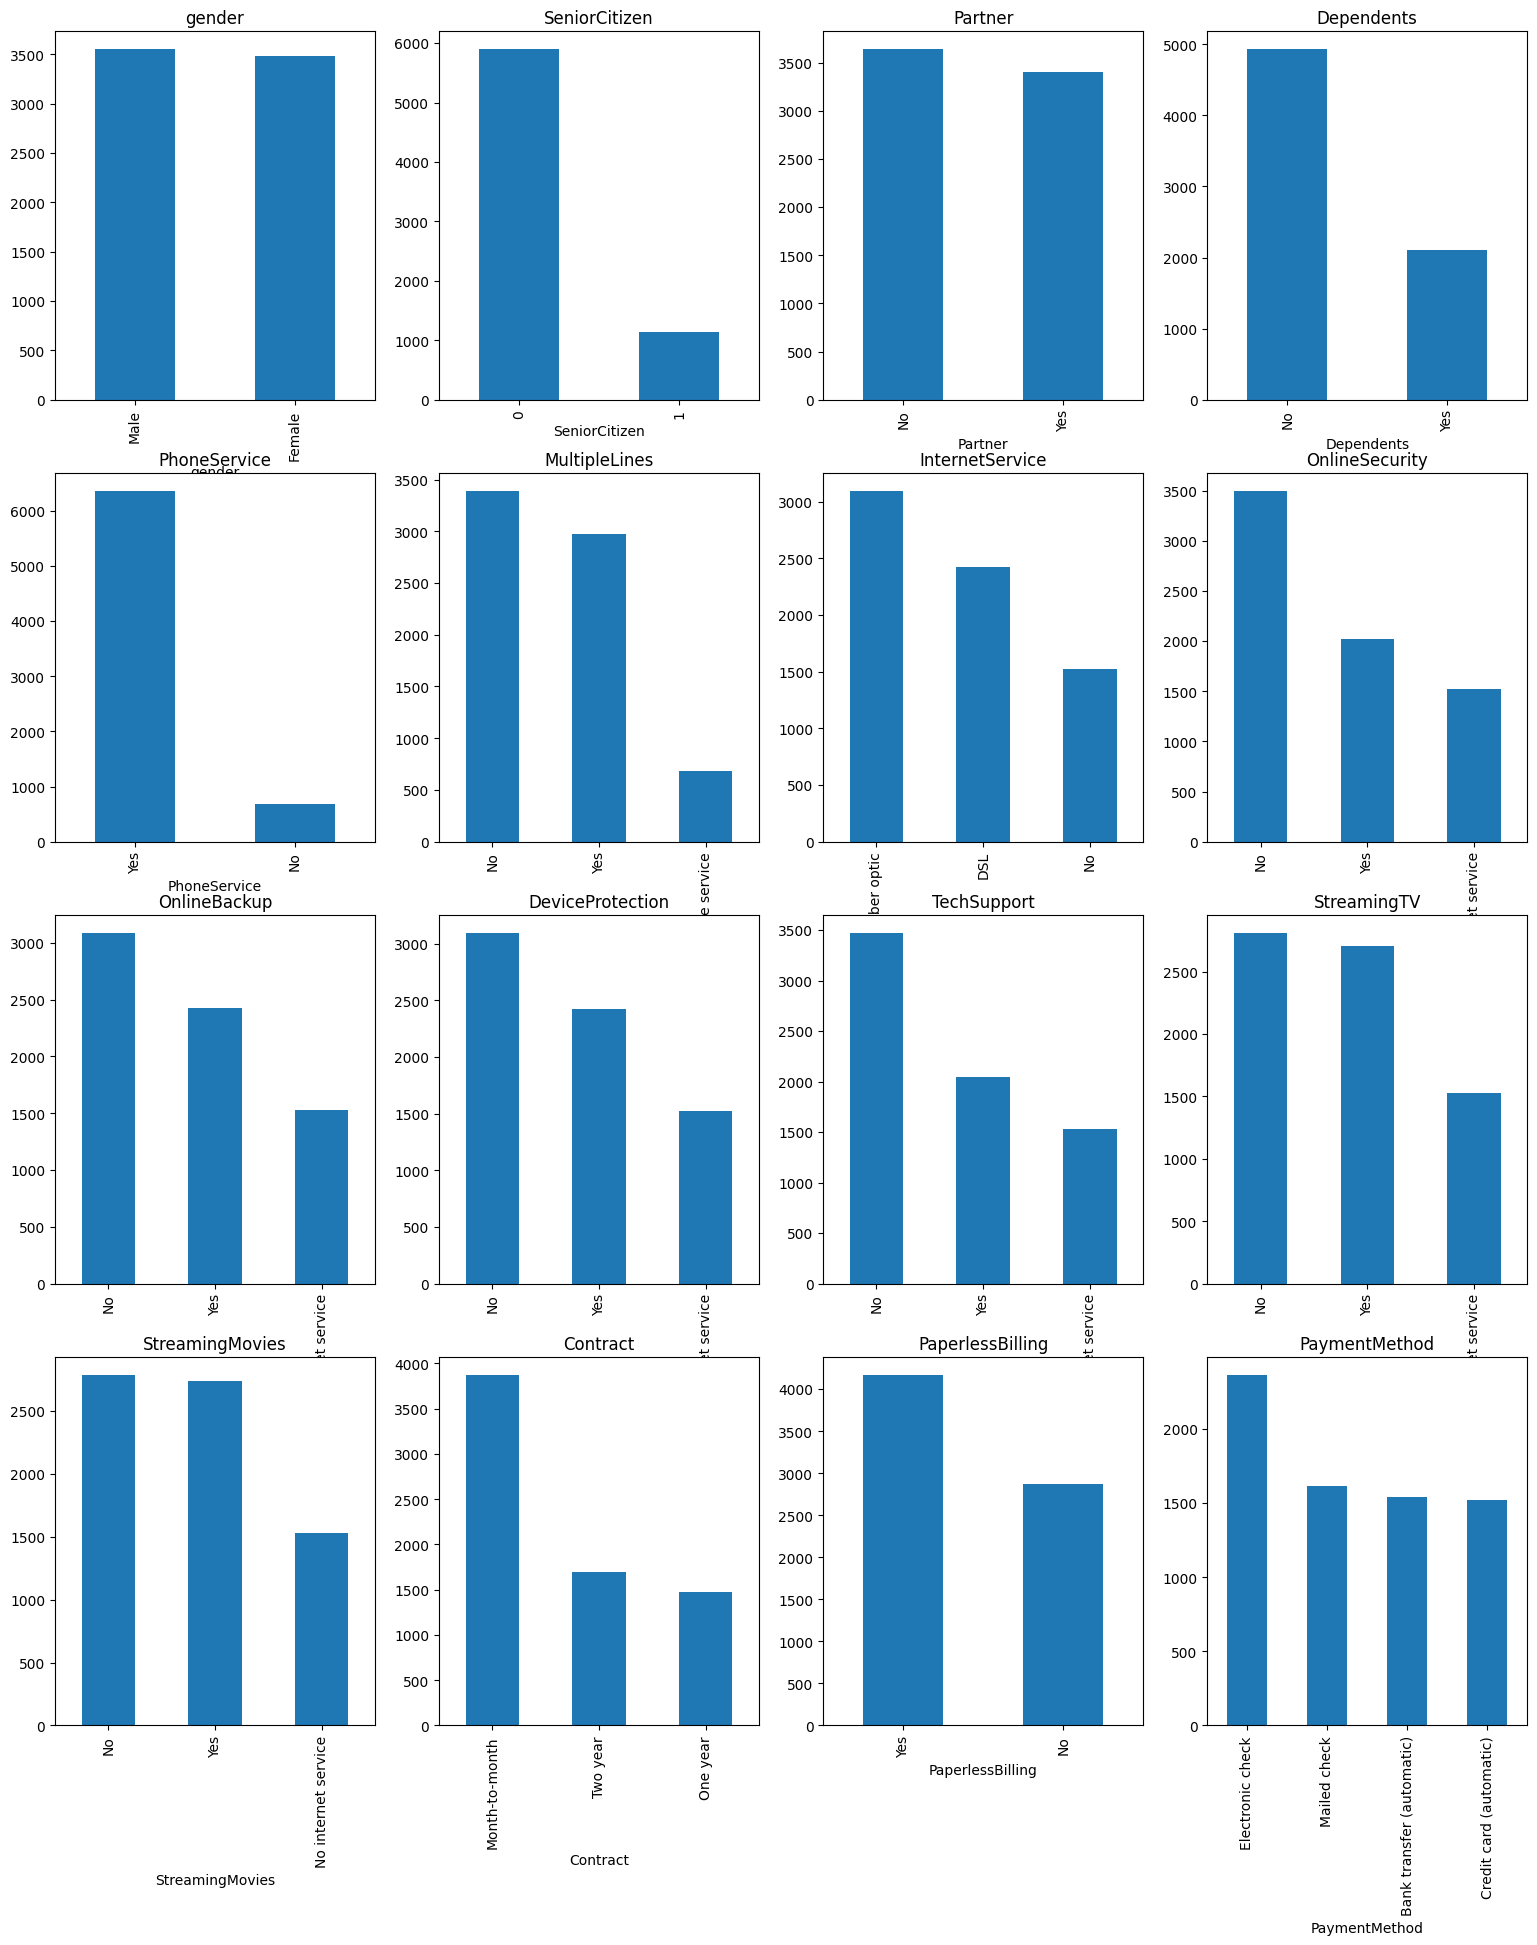

In [21]:
# Visualizing Categorical Feature Distributions

ROWS,COLS=4,4
fig,ax=plt.subplots(ROWS,COLS,figsize=(19,22))
row,col=0,0,
for i,categorical_feature in enumerate(categorical_features):
  if col==COLS-1:
    row+=1
  col=i%COLS
  data[categorical_feature].value_counts().plot(kind="bar",ax=ax[row,col]).set_title(categorical_feature)

In [22]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Churned')

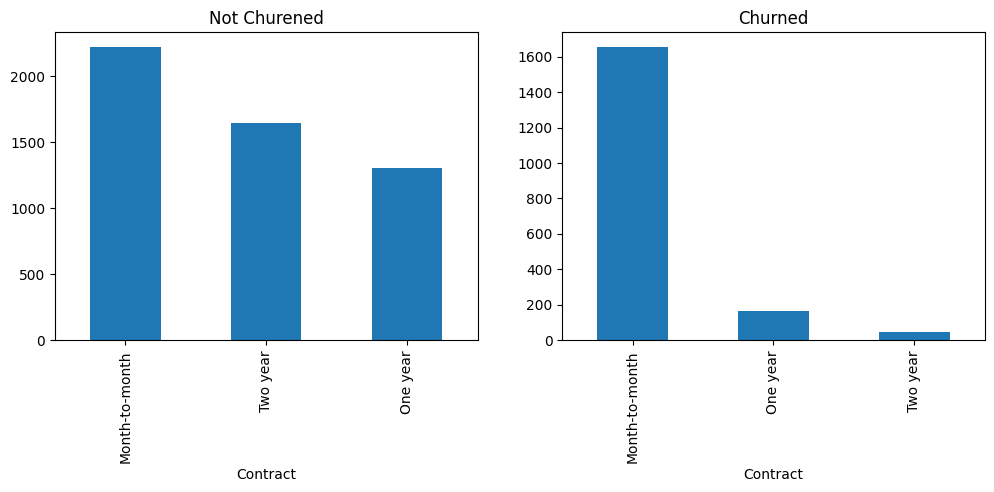

In [23]:
# Comparing Contract Types for Churned and Non-Churned Customers

feature="Contract"
fig,ax=plt.subplots(1,2,figsize=(12,4))
data[data.Churn=="No"][feature].value_counts().plot(kind="bar",ax=ax[0]).set_title("Not Churened")
data[data.Churn=="Yes"][feature].value_counts().plot(kind="bar",ax=ax[1]).set_title("Churned")

Text(0.5, 1.0, 'Churned')

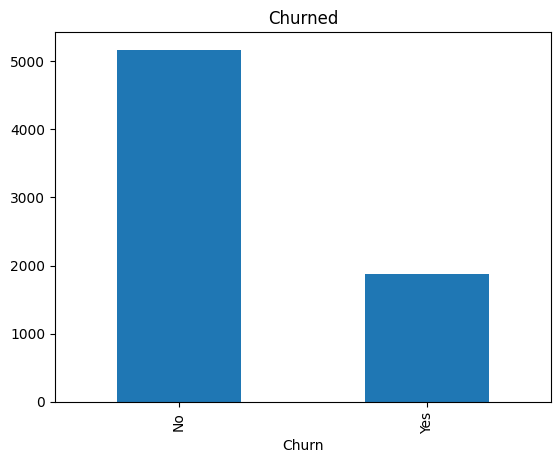

In [24]:
# visualizing the customer churn distribution

data[target].value_counts().plot(kind="bar").set_title("Churned")

In [25]:
# Identifying Outliers in Numerical Features

x=["tenure","MonthlyCharges"]
def count_outliers(df,col):
  q1=df[col].quantile(0.25,interpolation="nearest")
  q2=df[col].quantile(0.5,interpolation="nearest")
  q3=df[col].quantile(0.75,interpolation="nearest")
  q4=df[col].quantile(1,interpolation="nearest")
  IQR=q3-q1
  global LLP
  global ULP
  LLP=q1-1.5*IQR
  ULP=q3+1.5*IQR
  if df[col].min()>LLP and df[col].max()<ULP:
    print("No Outliers in ",i)
  else:
    print("There are Outliers in ",i)
    x=df[df[col]<LLP[col]].size
    y=df[df[col]>ULP[col]].size
    a.append(i)
    print("count of outliers are: ",x+y)


global a
a=[]
for i in x:
  count_outliers(data,i)

No Outliers in  tenure
No Outliers in  MonthlyCharges


In [26]:
# Removing the Customer ID Column

data.drop(["customerID"],axis=1,inplace=True)

In [27]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# Encoding Categorical Variables with One-Hot Encoding

data1=pd.get_dummies(data=data,columns=["gender", "Partner", "Dependents",
       "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
       "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
       "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"], drop_first=True,dtype="int")

In [29]:
data1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [30]:
data1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [31]:
data1=data1[["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges",
       "gender_Male", "Partner_Yes", "Dependents_Yes", "PhoneService_Yes",
       "MultipleLines_No phone service", "MultipleLines_Yes",
       "InternetService_Fiber optic", "InternetService_No",
       "OnlineSecurity_No internet service", "OnlineSecurity_Yes",
       "OnlineBackup_No internet service", "OnlineBackup_Yes",
       "DeviceProtection_No internet service", "DeviceProtection_Yes",
       "TechSupport_No internet service", "TechSupport_Yes",
       "StreamingTV_No internet service", "StreamingTV_Yes",
       "StreamingMovies_No internet service", "StreamingMovies_Yes",
       "Contract_One year", "Contract_Two year", "PaperlessBilling_Yes",
       "PaymentMethod_Credit card (automatic)",
       "PaymentMethod_Electronic check", "PaymentMethod_Mailed check",
       "Churn_Yes"]]

In [32]:
data1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [33]:
data1.shape

(7043, 31)

In [34]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
data1.TotalCharges=imputer.fit_transform(data1["TotalCharges"].values.reshape(-1,1))

In [35]:
# Initializing the Standard Scaler for Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
# Scaling Features Using Standard Scaler

scaler.fit(data1.drop(["Churn_Yes"],axis=1))
scaled_feature=scaler.transform(data1.drop("Churn_Yes",axis=1))

In [37]:
from sklearn.model_selection import train_test_split
X=scaled_feature
Y=data1["Churn_Yes"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=44)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [39]:
# Making Predictions with the Logistic Regression Model

PredLR=logmodel.predict(X_test)

In [40]:
PredLR

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
Y_test

,Churn_Yes
5616,0
2937,0
1355,0
5441,1
3333,0
...,...
2797,1
412,0
174,0
5761,0


In [42]:
print(classification_report(Y_test,PredLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



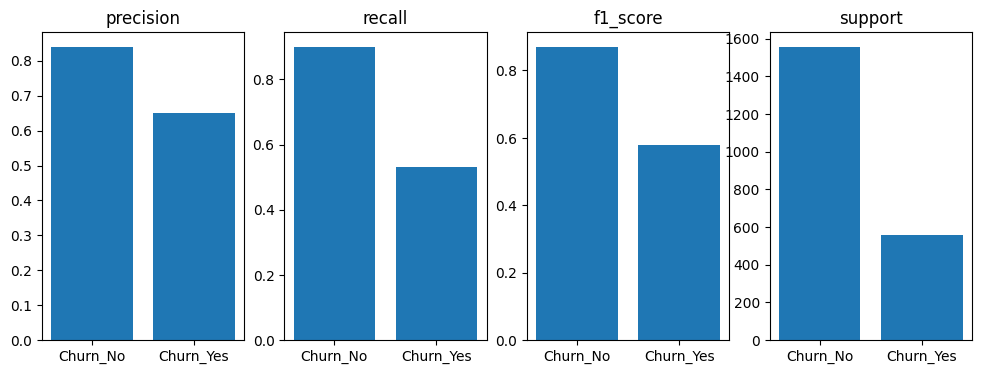

In [43]:
#calculate the classfication Report
report=classification_report(Y_test,PredLR,target_names=["Churn_No","Churn_Yes"])

#split the report into lines
lines=report.split("\n")

#split the each line into parts
parts=[line.split() for line in lines[2:-5]]

#extract the metrics for each class
class_metrics=dict()
for part in parts:
  class_metrics[part[0]]={"precision":float(part[1]),"recall":float(part[2]),"f1_score":float(part[3]),"support":int(part[4])}

#create a bar chart for each metric
fig,ax=plt.subplots(1,4,figsize=(12,4))
metrics_list=["precision","recall","f1_score","support"] # Changed variable name to avoid conflict
for i, metric in enumerate(metrics_list): # Iterate over the metrics
  ax[i].bar(class_metrics.keys(),[class_metrics[key][metric] for key in class_metrics.keys()])
  ax[i].set_title(metric) # Use parenthesis for set_title
plt.show()

In [44]:
confusion_matrix_LR=confusion_matrix(Y_test,PredLR)

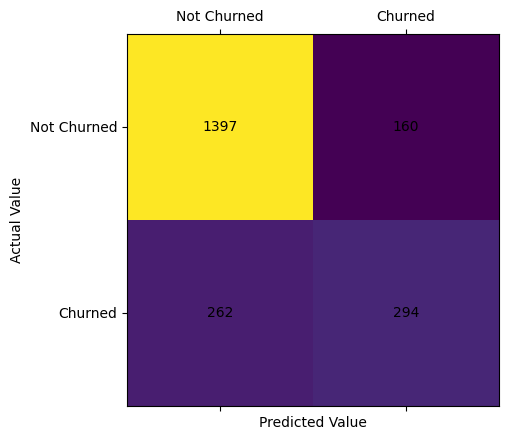

In [45]:
#creating the heatmap of the matrix using matshow()
plt.matshow(confusion_matrix(Y_test,PredLR))

#add the labels for the x and y axes
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
for i in range(2):
  for j in range(2):
    plt.text(j,i,confusion_matrix_LR[i,j],ha="center",va="center")

#add the custom labels for x and y ticks
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [46]:
# Evaluating Model Accuracy on the Training Set

logmodel.score(X_train,Y_train)

0.8064908722109534

In [47]:
# Calculating Model Accuracy on the Test Set

accuracy_score(Y_test,PredLR)

0.8002839564600095

In [48]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
y_pred_svc=svc.predict(X_test)

In [49]:
print(classification_report(Y_test,y_pred_svc) )

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [50]:
confusion_matrix_svc=confusion_matrix(Y_test,y_pred_svc)

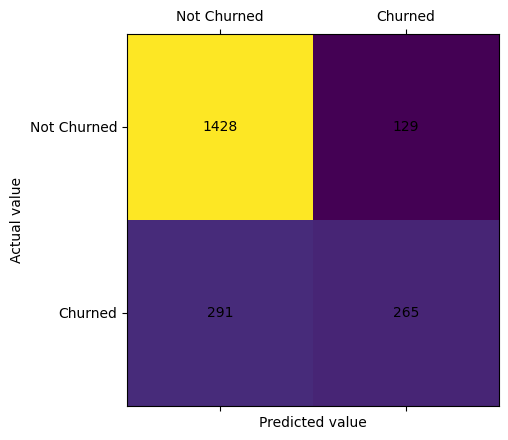

In [51]:
# Creating a Heatmap for the Support Vector Classifier Confusion Matrix
plt.matshow(confusion_matrix_svc)

# add the labels for x and y axes
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

for i in range(2):
  for j in range(2):
    plt.text(j,i,confusion_matrix_svc[i,j],ha="center",va="center")

#add custom label for x and y ticks
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [52]:
# Evaluating Model Accuracy on the Training Set for SVC

svc.score(X_train,Y_train)

0.8170385395537525

In [53]:
# Calculating Model Accuracy on the Test Set for SVC

accuracy_score(Y_test,y_pred_svc)

0.8012304779933743

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred_dtc=dtc.predict(X_test)

In [55]:
print(classification_report(Y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1557
           1       0.47      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



In [56]:
# Generating the Confusion Matrix for the Decision Tree Classifier

confusion_matrix_dtc=confusion_matrix(Y_test,y_pred_dtc)

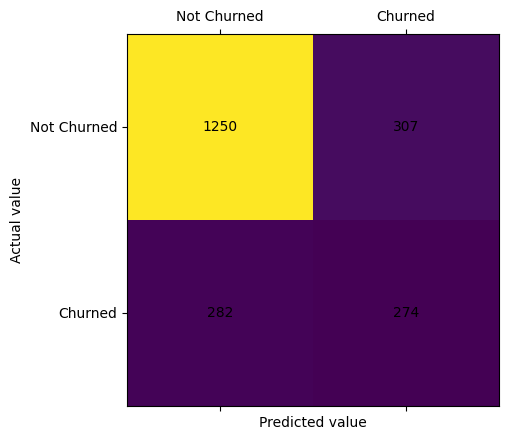

In [57]:
# Creating a Heatmap for the Decision Tree Classifier Confusion Matrix

plt.matshow(confusion_matrix_dtc)

# add labels for x and y axes
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

for i in range(2):
  for j in range(2):
    plt.text(j,i,confusion_matrix_dtc[i,j],ha="center",va="center")

# add custom label for x and y ticks
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [58]:
# Evaluating Model Accuracy on the Training Set for Decision Tree Classifier

dtc.score(X_train,Y_train)

0.9987829614604462

In [59]:
# Calculating Model Accuracy on the Test Set for Decision Tree Classifier

accuracy_score(Y_test,y_pred_dtc)

0.7212494084240416

In [60]:
# Training a K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [61]:
# Making Predictions with the K-Neighbors Classifier

pred_knn=knn.predict(X_test)

In [62]:
# Calculating Error Rate for Different Values of k in K-Neighbors Classifier

error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=Y_test))


Text(0, 0.5, 'Error Rate')

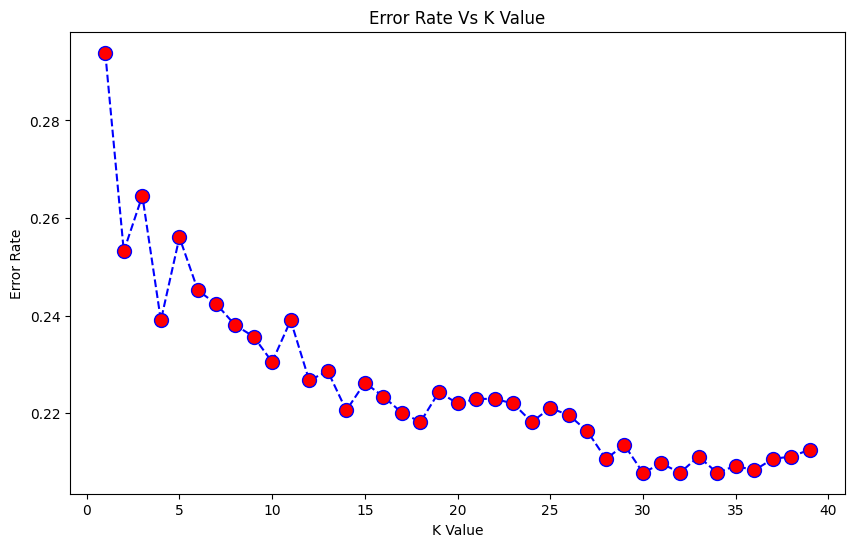

In [63]:
# Plotting Error Rate vs. K Value for K-Neighbors Classifier

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",ls="--",marker="o",mfc="red",ms=10)
plt.title("Error Rate Vs K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [64]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [65]:
confusion_matrix_knn=confusion_matrix(Y_test,pred_knn)

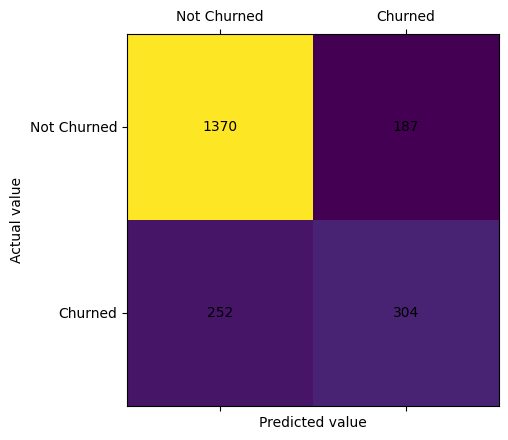

In [66]:
# Creating a Heatmap for the K-Neighbors Classifier Confusion Matrix

plt.matshow(confusion_matrix_knn)

#add the labels for x and y axes
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

for i in range(2):
  for j in range(2):
    plt.text(j,i,confusion_matrix_knn[i,j],ha="center",va="center")

#add the custom labels for x and y ticks
plt.xticks([0,1],["Not Churned","Churned"])
plt.yticks([0,1],["Not Churned","Churned"])
plt.show()

In [67]:
# Evaluating Model Accuracy on the Training Set for K-Neighbors Classifier

knn.score(X_train,Y_train)

0.8008113590263691

In [68]:
# Calculating Model Accuracy on the Test Set for K-Neighbors Classifier

accuracy_score(Y_test,pred_knn)

0.792238523426408